<h1>Stock Market Price Prediction</h1>

<h3>Importing the Libraries</h3>

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as web

In [83]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

Loading the Data

In [84]:
company ='TCS'

In [91]:
start = dt.datetime(2018,1,1)
end = dt.datetime(2022,12,1)

In [92]:
data = web.DataReader(company, 'yahoo', start, end)

In [93]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-25,4.86,4.71,4.79,4.71,112400.0,4.71
2022-11-28,4.80,4.60,4.64,4.62,300900.0,4.62
2022-11-29,4.68,4.58,4.59,4.63,202200.0,4.63
2022-11-30,4.80,4.61,4.69,4.75,249900.0,4.75
2022-12-01,4.89,4.74,4.78,4.81,273300.0,4.81


Prepare the Data

In [66]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))  

prediction_days = 60

In [67]:
x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

In [68]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

Build The Model

In [69]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences= True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1)) #prediction of the next closing price

In [70]:
model.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the model
model.fit(x_train, y_train, epochs= 25, batch_size=32)

Epoch 1/25
6/6 [==============================] - 9s 76ms/step - loss: 0.0484
Epoch 2/25
6/6 [==============================] - 0s 63ms/step - loss: 0.0138
Epoch 3/25
6/6 [==============================] - 0s 67ms/step - loss: 0.0122
Epoch 4/25
6/6 [==============================] - 0s 62ms/step - loss: 0.0071
Epoch 5/25
6/6 [==============================] - 0s 64ms/step - loss: 0.0077
Epoch 6/25
6/6 [==============================] - 0s 67ms/step - loss: 0.0069
Epoch 7/25
6/6 [==============================] - 0s 64ms/step - loss: 0.0061
Epoch 8/25
6/6 [==============================] - 0s 64ms/step - loss: 0.0050
Epoch 9/25
6/6 [==============================] - 0s 68ms/step - loss: 0.0042
Epoch 10/25
6/6 [==============================] - 0s 66ms/step - loss: 0.0041
Epoch 11/25
6/6 [==============================] - 0s 69ms/step - loss: 0.0049
Epoch 12/25
6/6 [==============================] - 0s 67ms/step - loss: 0.0047
Epoch 13/25
6/6 [==============================] - 0s 68ms/st

Test the model accuracy on existing data

Load Test Data

In [71]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset= pd.concat((data['Close'], test_data['Close']), axis=0)


In [72]:
model_inputs = total_dataset[len(total_dataset) - len(test_data-prediction_days):].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

Make predictions on test data

In [73]:
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)



6/6 [==============================] - 2s 27ms/step


Plot the Test Predictions

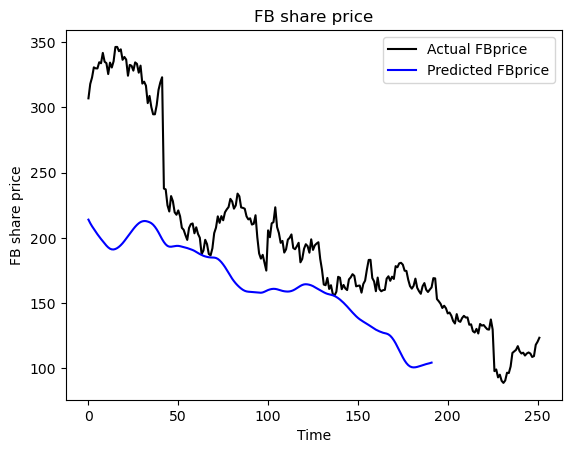

In [74]:
plt.plot(actual_prices, color='black', label=f"Actual {company}price")
plt.plot(predicted_prices, color='blue',label=f"Predicted {company}price")
plt.title(f"{company} share price")
plt.xlabel('Time')
plt.ylabel(f"{company} share price")
plt.legend()

plt.show()

Predict the next day  stock price

In [75]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs + 1), 0 ]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)

print(f"Prediction:{prediction}")

1/1 [==============================] - 2s 2s/step
Prediction:[[105.018585]]
